In [132]:
import seaborn as sns # visualization
import math as m 
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools
import warnings
warnings.filterwarnings('ignore')

In [133]:
df = pd.read_csv(r"E:\courses\AI All\Amit Machin Learning\Data\Hotel Reservations\Hotel Reservations.csv")
print("Dataset size")
print(cl("Rows {} Columns {}".format(df.shape[0], df.shape[1]), attrs = ['bold'], color = 'black'))
df.head()

Dataset size
Rows 36275 Columns 19


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [134]:
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

,dtype
Booking_ID,object
no_of_adults,int64
no_of_children,int64
no_of_weekend_nights,int64
no_of_week_nights,int64
type_of_meal_plan,object
required_car_parking_space,int64
room_type_reserved,object
lead_time,int64
arrival_year,int64


In [135]:
df.describe(include = 'all').T.fillna(0)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275.0,36275,INN00001,1,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0
no_of_adults,36275.0,0,0,0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0,0,0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0,0,0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,0,0,0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
type_of_meal_plan,36275.0,4,Meal Plan 1,27835,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0
required_car_parking_space,36275.0,0,0,0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
room_type_reserved,36275.0,7,Room_Type 1,28130,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0
lead_time,36275.0,0,0,0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,0,0,0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0


In [136]:
pd.DataFrame(df.info()).rename(columns = {0:'Index',1:'dtype',2:'See Null',3:'Dtype'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

""


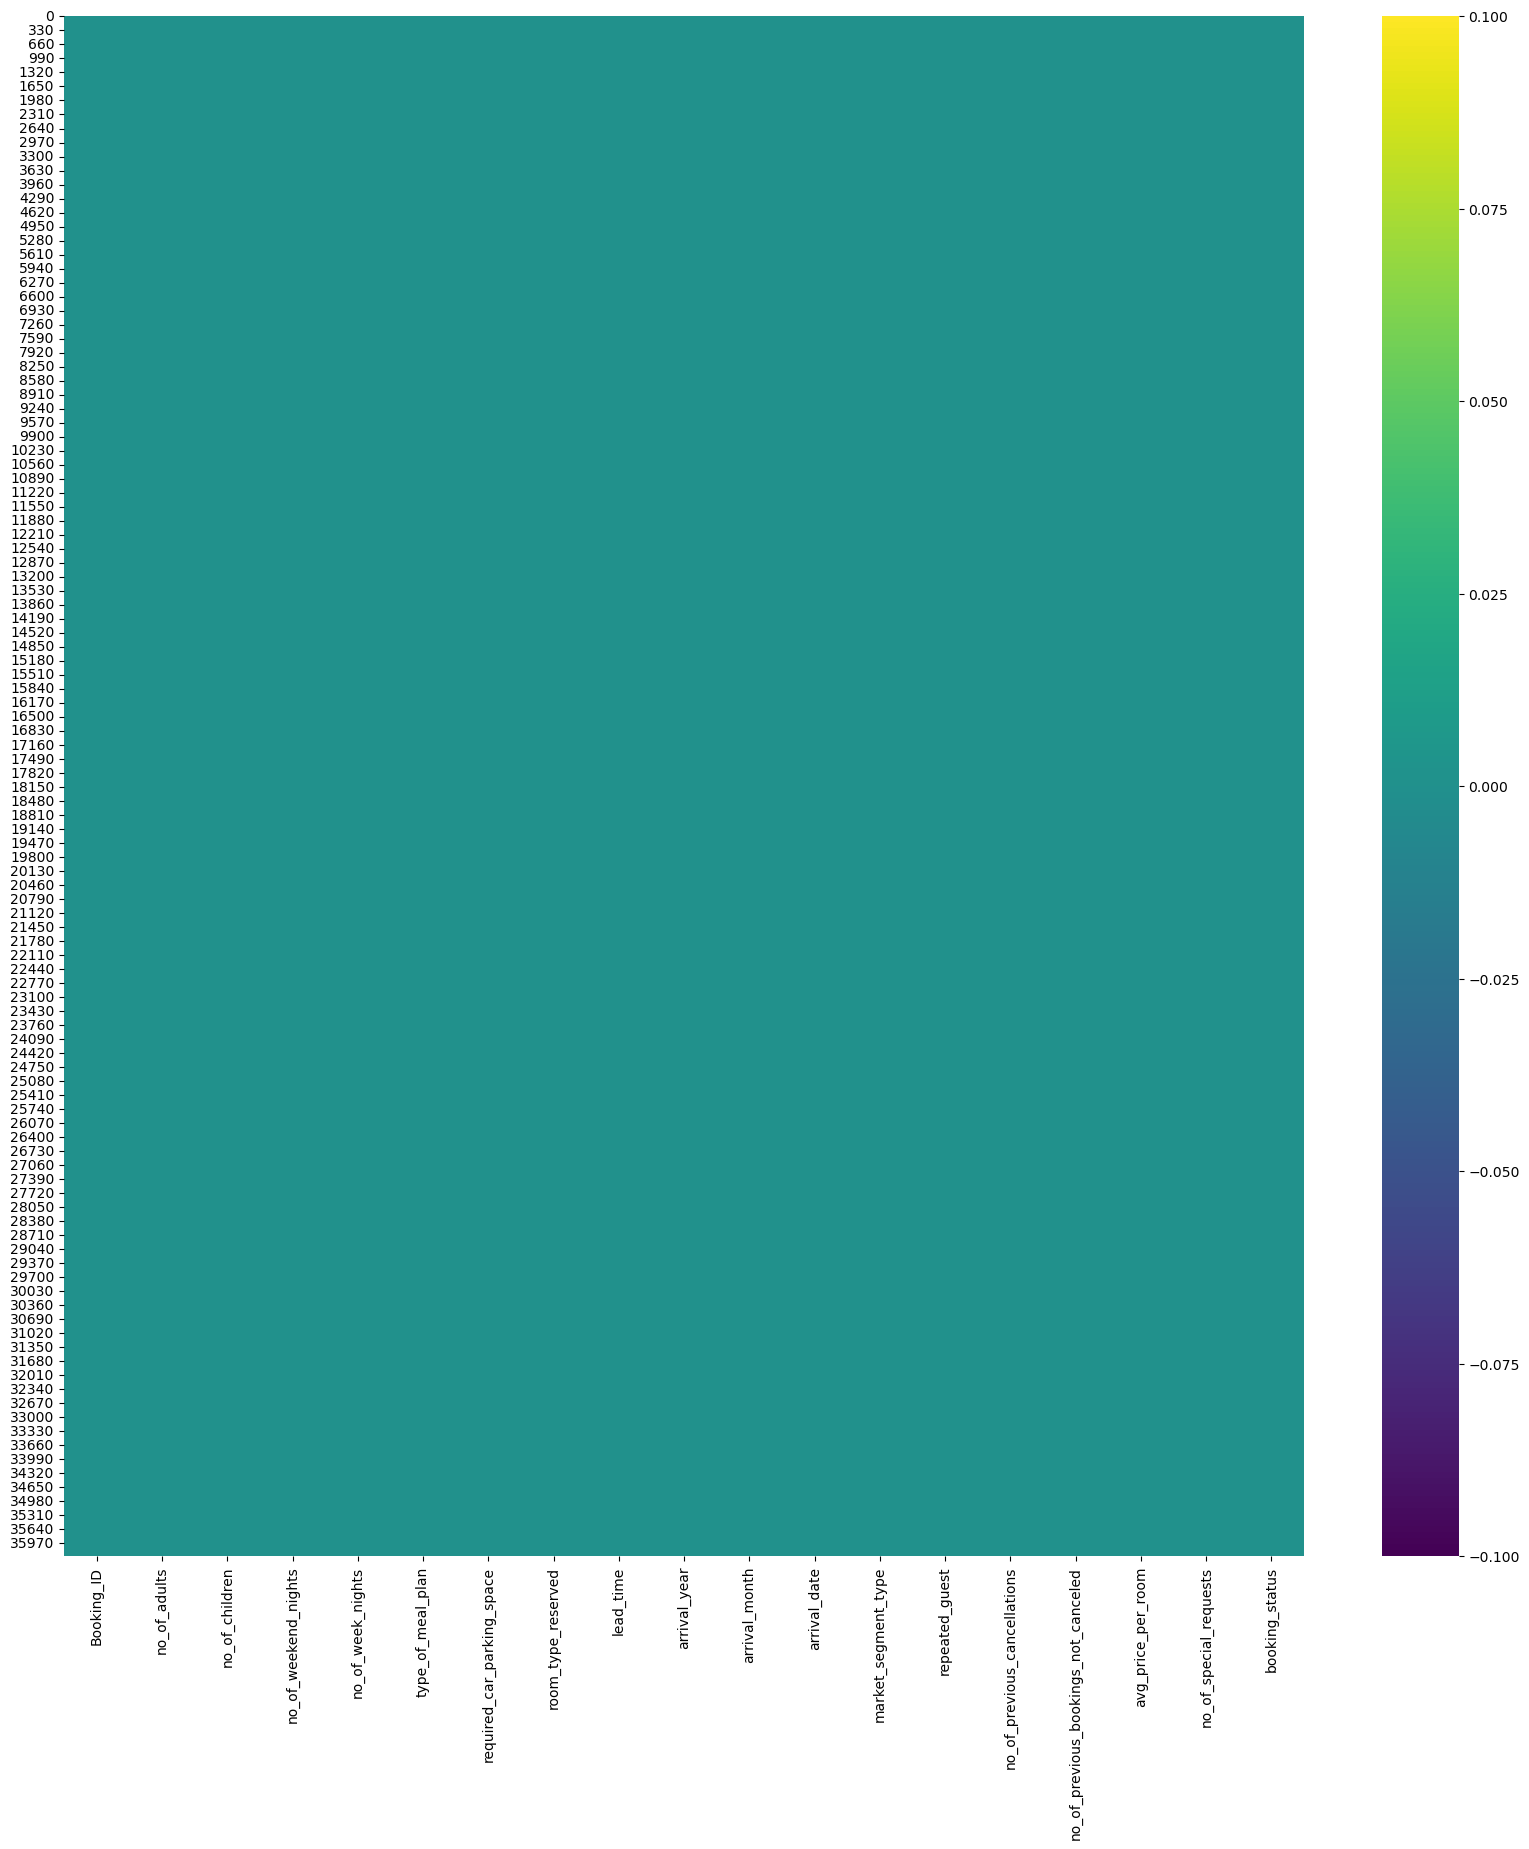

In [137]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),cmap = 'viridis')
plt.show()

In [138]:
pd.DataFrame(df.isna().sum()).rename(columns = {0:'See Null Values'})

,See Null Values
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [139]:
df.duplicated().sum()

0

In [140]:
pd.DataFrame(df.mean()).rename(columns = {0:'Mean'})

,Mean
no_of_adults,1.844962
no_of_children,0.105279
no_of_weekend_nights,0.810724
no_of_week_nights,2.204300
required_car_parking_space,0.030986
lead_time,85.232557
arrival_year,2017.820427
arrival_month,7.423653
arrival_date,15.596995
repeated_guest,0.025637


In [141]:
med = pd.DataFrame(df.median()).rename(columns = {0:'median'})
med

,median
no_of_adults,2.00
no_of_children,0.00
no_of_weekend_nights,1.00
no_of_week_nights,2.00
required_car_parking_space,0.00
lead_time,57.00
arrival_year,2018.00
arrival_month,8.00
arrival_date,16.00
repeated_guest,0.00


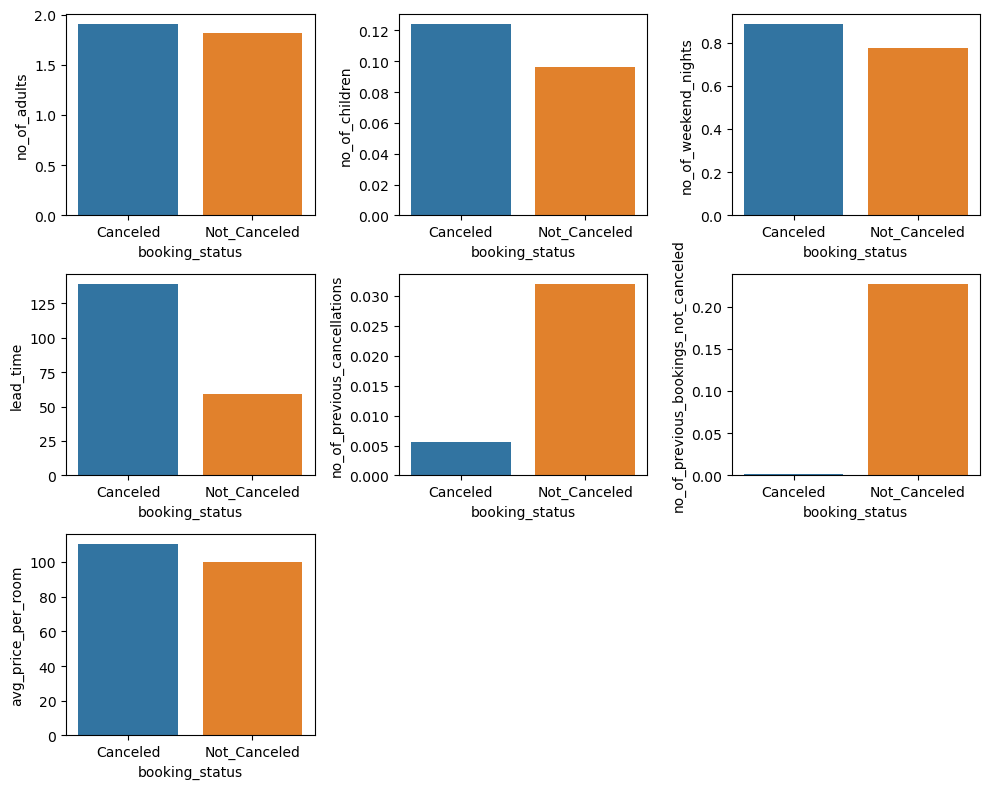

In [142]:
plt.figure(figsize=(10,8))

plt.subplot(3,3,1)
sns.barplot(x='booking_status', y='no_of_adults', data=df.groupby('booking_status')['no_of_adults'].mean().reset_index())

plt.subplot(3,3,2)
sns.barplot(x='booking_status', y='no_of_children', data=df.groupby('booking_status')['no_of_children'].mean().reset_index())

plt.subplot(3,3,3)
sns.barplot(x='booking_status', y='no_of_weekend_nights', data=df.groupby('booking_status')['no_of_weekend_nights'].mean().reset_index())

plt.subplot(3,3,4)
sns.barplot(x='booking_status', y='lead_time', data=df.groupby('booking_status')['lead_time'].mean().reset_index())

plt.subplot(3,3,5)
sns.barplot(x='booking_status', y='no_of_previous_cancellations', data=df.groupby('booking_status')['no_of_previous_cancellations'].mean().reset_index())

plt.subplot(3,3,6)
sns.barplot(x='booking_status', y='no_of_previous_bookings_not_canceled', data=df.groupby('booking_status')['no_of_previous_bookings_not_canceled'].mean().reset_index())

plt.subplot(3,3,7)
sns.barplot(x='booking_status', y='avg_price_per_room', data=df.groupby('booking_status')['avg_price_per_room'].mean().reset_index())

plt.tight_layout()

In [143]:
max = pd.DataFrame(df.max()).rename(columns = {0:'Maxmimum'})
max

,Maxmimum
Booking_ID,INN36275
no_of_adults,4
no_of_children,10
no_of_weekend_nights,7
no_of_week_nights,17
type_of_meal_plan,Not Selected
required_car_parking_space,1
room_type_reserved,Room_Type 7
lead_time,443
arrival_year,2018


In [144]:
min = pd.DataFrame(df.min()).rename(columns = {0:'Minimum'})
min

,Minimum
Booking_ID,INN00001
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,Meal Plan 1
required_car_parking_space,0
room_type_reserved,Room_Type 1
lead_time,0
arrival_year,2017


In [145]:
for i,row in min.iterrows():
    try:
        above_35 = df[df[i] > row[0]]
        print(cl("column is: {} Rows: {} ".format(i,above_35.shape[0]), attrs = ['bold'], color = 'black'))
    except:
        pass

column is: Booking_ID Rows: 36274 
column is: no_of_adults Rows: 36136 
column is: no_of_children Rows: 2698 
column is: no_of_weekend_nights Rows: 19403 
column is: no_of_week_nights Rows: 33888 
column is: type_of_meal_plan Rows: 8440 
column is: required_car_parking_space Rows: 1124 
column is: room_type_reserved Rows: 8145 
column is: lead_time Rows: 34978 
column is: arrival_year Rows: 29761 
column is: arrival_month Rows: 35261 
column is: arrival_date Rows: 35142 
column is: market_segment_type Rows: 36150 
column is: repeated_guest Rows: 930 
column is: no_of_previous_cancellations Rows: 338 
column is: no_of_previous_bookings_not_canceled Rows: 812 
column is: avg_price_per_room Rows: 35730 
column is: no_of_special_requests Rows: 16498 
column is: booking_status Rows: 24390 


In [146]:
for i,row in med.iterrows():
    try:
        above_35 = df[df[i] > row[0]]
        print(cl("column is :{} above median number of  Rows: {} ".format(i,above_35.shape[0]), attrs = ['bold'], color = 'black'))
        print(cl("####"*30))
    except:
        pass

column is :no_of_adults above median number of  Rows: 2333 
########################################################################################################################
column is :no_of_children above median number of  Rows: 2698 
########################################################################################################################
column is :no_of_weekend_nights above median number of  Rows: 9408 
########################################################################################################################
column is :no_of_week_nights above median number of  Rows: 12956 
########################################################################################################################
column is :required_car_parking_space above median number of  Rows: 1124 
########################################################################################################################
column is :lead_time above median number of  Rows: 18073 
#######

In [147]:
for (i, row1), (j, row2) in zip(min.iterrows(), max.iterrows()):
    try:
        class_min_max = df[df[i].isin([float(row1[0]),float(row2[0])])]
        print("count of '{}' is in min and max is : {}".format(i,class_min_max.shape[0]))
        print("Rows :{}".format(class_min_max.shape[0]))
    except:
        pass

count of 'no_of_adults' is in min and max is : 155
Rows :155
count of 'no_of_children' is in min and max is : 33578
Rows :33578
count of 'no_of_weekend_nights' is in min and max is : 16873
Rows :16873
count of 'no_of_week_nights' is in min and max is : 2390
Rows :2390
count of 'required_car_parking_space' is in min and max is : 36275
Rows :36275
count of 'lead_time' is in min and max is : 1319
Rows :1319
count of 'arrival_year' is in min and max is : 36275
Rows :36275
count of 'arrival_month' is in min and max is : 4035
Rows :4035
count of 'arrival_date' is in min and max is : 1711
Rows :1711
count of 'repeated_guest' is in min and max is : 36275
Rows :36275
count of 'no_of_previous_cancellations' is in min and max is : 35941
Rows :35941
count of 'no_of_previous_bookings_not_canceled' is in min and max is : 35464
Rows :35464
count of 'avg_price_per_room' is in min and max is : 546
Rows :546
count of 'no_of_special_requests' is in min and max is : 19785
Rows :19785


In [148]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


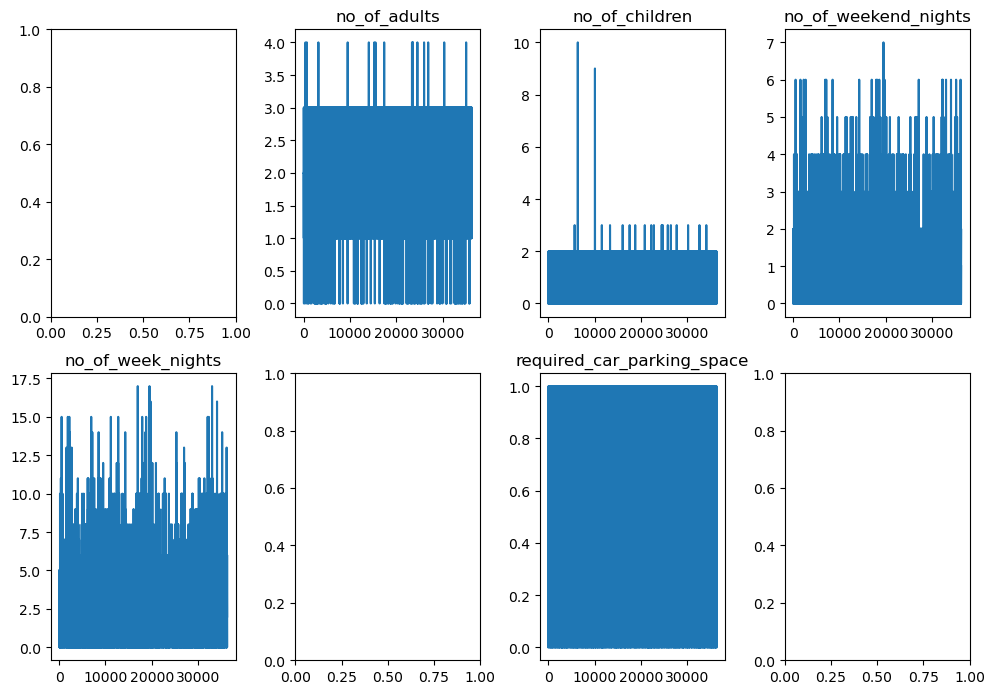

In [149]:
feature_list = df.columns
fig = plt.figure(figsize = (10,7))

for i in range(len(feature_list)):
    try:
        col = feature_list[i]
        sub = fig.add_subplot(2,4,i+1)
        chart = df[col].plot()
        chart.set_title(col)
    except:
        pass
plt.tight_layout(pad = 0.9)

In [150]:
adult_0 = df[df['no_of_adults'] == 0]
len(adult_0)

139

In [151]:
adult_0['no_of_children'].value_counts()

2    133
3      5
1      1
Name: no_of_children, dtype: int64

In [152]:
df[df['no_of_children'] == 2]['no_of_adults'].value_counts()

2    871
0    133
1     53
3      1
Name: no_of_adults, dtype: int64

In [153]:
df['no_of_adults'].value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

In [154]:
df['no_of_adults']= df['no_of_adults'].replace(0,2)
df['no_of_adults'].value_counts()

2    26247
1     7695
3     2317
4       16
Name: no_of_adults, dtype: int64

In [155]:
df['no_of_children'].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

In [156]:
df['no_of_children'].replace(9,2,inplace = True)
df['no_of_children'].replace(10,2,inplace = True)

In [157]:
df['no_of_children'].value_counts()

0    33577
1     1618
2     1061
3       19
Name: no_of_children, dtype: int64

In [158]:
df['no_of_weekend_nights'].value_counts()

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

In [159]:
weekend_nights = df[df['no_of_weekend_nights'] == 0]
fake = weekend_nights[weekend_nights['no_of_week_nights'] == 0]
len(fake)

78

In [160]:
fake['booking_status'].value_counts()

Not_Canceled    76
Canceled         2
Name: booking_status, dtype: int64

In [161]:
not_canceled = df[df['booking_status'] == 'Not_Canceled']
see = not_canceled[not_canceled['no_of_weekend_nights'] != 0]
mode = see['no_of_weekend_nights'].mode()
mode

0    1
Name: no_of_weekend_nights, dtype: int64

In [162]:
for i in range(len(df)):
    if df.loc[i,'no_of_weekend_nights'] == 0 and df.loc[i,'no_of_week_nights'] == 0:
        df.loc[i,'no_of_weekend_nights'] = 2 

In [164]:
df['no_of_weekend_nights'].value_counts()

0    16794
1     9995
2     9149
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

In [168]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [170]:
df['avg_price_per_room'].min()

0.0

In [172]:
not_canceled = df[df['booking_status'] == 'Not_Canceled']
see = not_canceled[not_canceled['avg_price_per_room'] == 0]
print('number of zeros not canceld is : ',len(see))
see

number of zeros not canceld is :  539


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,INN00064,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,INN00146,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,INN00210,1,0,2,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,INN00267,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,INN00268,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,INN35984,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,INN36081,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,INN36115,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,INN36218,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


In [173]:
check = not_canceled[not_canceled['avg_price_per_room'] != 0]
print('number of paid not canceld is : ',len(check))
check

number of paid not canceld is :  23851


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36263,INN36264,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,2,28,Online,0,0,0,1.00,0,Not_Canceled
36265,INN36266,2,0,1,3,Meal Plan 1,0,Room_Type 1,15,2018,5,30,Online,0,0,0,100.73,0,Not_Canceled
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled


In [176]:
not_canceled = df[df['booking_status'] == 'Not_Canceled']
to_can_clean_data = not_canceled[not_canceled['no_of_weekend_nights'] != 0]
to_can_clean_data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
10,INN00011,1,0,1,0,Not Selected,0,Room_Type 1,0,2018,9,11,Online,0,0,0,85.03,0,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36263,INN36264,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,2,28,Online,0,0,0,1.00,0,Not_Canceled
36265,INN36266,2,0,1,3,Meal Plan 1,0,Room_Type 1,15,2018,5,30,Online,0,0,0,100.73,0,Not_Canceled
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled


In [181]:
med  = to_can_clean_data['avg_price_per_room'].median()
mean  = to_can_clean_data['avg_price_per_room'].mean()
mode  = to_can_clean_data['avg_price_per_room'].mode()
print('median of average is: ',med)
print('mean of average is: ',mean)
print('mode of average is: ',mode)
mode[0]

median of average is:  94.0
mean of average is:  99.43575155671212
mode of average is:  0    65.0
Name: avg_price_per_room, dtype: float64


65.0

In [190]:
see = df[df['booking_status']== 'Canceled']['avg_price_per_room']
len(see)

11885

In [188]:
for i in range(len(df)):
    if df.loc[i,'booking_status'] == 'Canceled' and df.loc[i,'avg_price_per_room'] != 0:
        df.loc[i,'avg_price_per_room'] = 0

In [189]:
see = df[df['booking_status']== 'Canceled']['avg_price_per_room']
len(see)

11885

In [192]:
see_not = df[df['booking_status']== 'not_Canceled']['avg_price_per_room']
len(see_not)

0

In [193]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,0.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,0.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,0.00,0,Canceled


In [200]:
df.drop('Booking_ID',axis = 1,inplace = True)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,0.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,0.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,0.00,0,Canceled


In [202]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtype=='object':
        lbl = LabelEncoder()
        lbl.fit(list(df[col].values)) 
        df[col] = lbl.transform(list(df[col].values))
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,0.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,0.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,0.00,0,0


<AxesSubplot:>

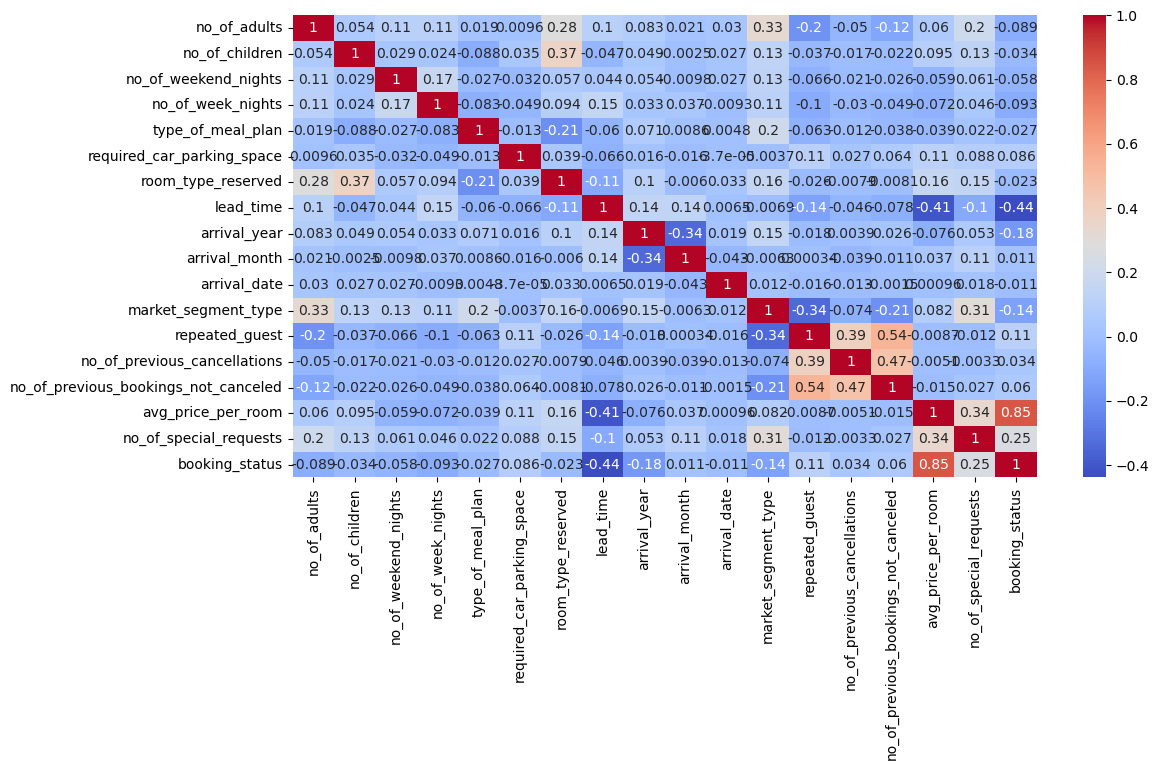

In [203]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm") 

In [204]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,0.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,0.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,3,85,2018,8,3,4,0,0,0,167.80,1,1
36271,2,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,0.00,2,0
36272,2,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2,1
36273,2,0,0,3,3,0,0,63,2018,4,21,4,0,0,0,0.00,0,0


In [215]:
num = df.select_dtypes("number")
corr1=[]
for col in num:
    corr = abs(df['booking_status'].corr(df[col]))
    corr1.append(corr)
 
 
corr = pd.Series(corr1, name="corr Scores", index=list(df.columns).remove('booking_status'))
corr = corr.sort_values(ascending=False)
print(corr)
f1 = corr.index[corr <  0.03].tolist()
ind = df.columns.get_loc("booking_status")
f1.append(ind)
x = df.drop(df.iloc[:, f1],axis = 1)
y = df['booking_status']
x

17    1.000000
15    0.847190
7     0.438538
16    0.253070
8     0.179529
11    0.136008
12    0.107287
3     0.092996
0     0.088743
5     0.086185
14    0.060179
2     0.058322
1     0.033821
13    0.033728
4     0.026706
6     0.022986
9     0.011233
10    0.010629
Name: corr Scores, dtype: float64


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,224,2017,3,0,0,0,65.00,0
1,2,0,2,3,0,5,2018,4,0,0,0,106.68,1
2,1,0,2,1,0,1,2018,4,0,0,0,0.00,0
3,2,0,0,2,0,211,2018,4,0,0,0,0.00,0
4,2,0,1,1,0,48,2018,4,0,0,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,4,0,0,0,167.80,1
36271,2,0,1,3,0,228,2018,4,0,0,0,0.00,2
36272,2,0,2,6,0,148,2018,4,0,0,0,98.39,2
36273,2,0,0,3,0,63,2018,4,0,0,0,0.00,0


In [218]:
def TrainTestSplitter(x,y, split_ratio):
  key = int(len(x) * (1-split_ratio))
  x_train = x[:key]      
  x_test = x[key:]       
  y_train = y[:key]     
  y_test = y[key:]      
  return x_train, x_test , y_train ,y_test 


x_train, x_test , y_train ,y_test =TrainTestSplitter(x,y, 0.3)


print('X_train shape : {} Rows : {} Columns : {}'.format(x_train.shape,x_train.shape[0],x_train.shape[1]))
print('X_test shape  : {} Rows : {} Columns : {}'.format(x_test.shape,x_test.shape[0],x_test.shape[1]))
print('y_train shape : {}    Rows : {} Columns : 1'.format(y_train.shape,y_train.shape[0]))
print('y_test shape  : {}    Rows : {} Columns : 1'.format(y_test.shape,y_test.shape[0]))

print('X_train samples : ', x_train[:1])
print('X_test samples : ', x_test[0:1])
print('y_train samples : ', y_train[0:10])
print('y_test samples : ', y_test[0:10])

print('###'*30)
print('X_train samples : ', x_train[:1].values)
print('X_test samples : ', x_test[0:1].values)
print('y_train samples : ', y_train[0:10].values)
print('y_test samples : ', y_test[0:10].values)

X_train shape : (25392, 13) Rows : 25392 Columns : 13
X_test shape  : (10883, 13) Rows : 10883 Columns : 13
y_train shape : (25392,)    Rows : 25392 Columns : 1
y_test shape  : (10883,)    Rows : 10883 Columns : 1
X_train samples :     no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   

   required_car_parking_space  lead_time  arrival_year  market_segment_type  \
0                           0        224          2017                    3   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0                65.0   

   no_of_special_requests  
0                       0  
X_test samples :         no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
25392             3               0                     2              

In [219]:
class StandardScaler(object):
    def __init__(self):
        pass

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X - self.mean_, axis=0)
        return self

    def transform(self, X):
        return (X - self.mean_) / self.scale_

    def fit_transform(self, X):
        return self.fit(X).transform(X)

In [220]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [221]:
from imblearn.under_sampling import RandomUnderSampler
sm = RandomUnderSampler(sampling_strategy = 2/3,random_state = 27)
x_train,y_train = sm.fit_resample(x_train,y_train)

In [222]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(fit_intercept=True, max_iter=100000)
log_model.fit(x_train,y_train)
y_pred = log_model.predict(x_test)

In [223]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3568   13]
 [  87 7215]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3581
           1       1.00      0.99      0.99      7302

    accuracy                           0.99     10883
   macro avg       0.99      0.99      0.99     10883
weighted avg       0.99      0.99      0.99     10883



In [232]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

99.2189653588165

In [233]:
train_y_pred = log_model.predict(x_train)
accuracy_score(y_train,train_y_pred)*100

99.21483622350674

In [234]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(random_state=0, max_depth=2)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_test,y_pred) *100

99.32922907286593

In [235]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)*100

99.2189653588165

In [236]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k = [1,2,3,4,5,6,7,8,9,int(m.sqrt(len(x_train)))]
for item in k :
    print(f'where k is = {item}')
    model = KNeighborsClassifier(n_neighbors = item)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print('accuracy is {}'.format(accuracy_score(y_test,y_pred)))
    print('-'*30)

where k is = 1
accuracy is 0.9936598364421575
------------------------------
where k is = 2
accuracy is 0.9917302214462924
------------------------------
where k is = 3
accuracy is 0.9931085178719103
------------------------------
where k is = 4
accuracy is 0.992189653588165
------------------------------
where k is = 5
accuracy is 0.9923734264449141
------------------------------
where k is = 6
accuracy is 0.9919139943030414
------------------------------
where k is = 7
accuracy is 0.9924653128732887
------------------------------
where k is = 8
accuracy is 0.9914545621611688
------------------------------
where k is = 9
accuracy is 0.9916383350179179
------------------------------
where k is = 144
accuracy is 0.9775797114766149
------------------------------


In [238]:
model = KNeighborsClassifier(n_neighbors = 144)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('accuracy is {}'.format(accuracy_score(y_test,y_pred)*100))

accuracy is 97.7579711476615
